In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


### Importando Base

In [3]:
df = pd.read_csv("base_nao_nula.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

### Verificando valores nulos

In [4]:
#função para exibir o valor de valores nulos em cada coluna
def exibir_colunas_com_valores_nulos(df):
        
    # Calcula o número de valores nulos em cada coluna
    valores_nulos_por_coluna = df.isnull().sum()
    
    # Filtra as colunas com mais de 3000 valores nulos
    colunas_com_menos_de_700_nulos = valores_nulos_por_coluna[valores_nulos_por_coluna >= 0]
    
    # Exibe o total de valores nulos para as colunas que têm mais de 3000 valores nulos
    print("Total de valores nulos para as colunas com valores nulos:")

In [5]:
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:


### Verificando tamanho da base

In [6]:
df.shape

(4558, 48)

In [7]:
df.columns

Index(['C006', 'M01401', 'M01501', 'E01602', 'VDF001', 'E017', 'D00901',
       'A001', 'A002010', 'A003010', 'A004010', 'J007', 'Q11006', 'N00101',
       'P034', 'P027', 'J01101', 'J014', 'N010', 'N011', 'N012', 'N013',
       'N014', 'N015', 'N016', 'N017', 'N018', 'P00104', 'P00404', 'J001',
       'J00101', 'J002', 'P006', 'P00901', 'P01101', 'P013', 'P015', 'P02001',
       'P01601', 'P018', 'P02002', 'P023', 'P02501', 'P02602', 'P02601',
       'E001', 'P050', 'Q092'],
      dtype='object')

### Iniciando tratamento dos outliers

#### Separando valores de colunas numericas, para visualizar graficamente

In [8]:
# Contar valores em 'E01602'
valores_salario = df['E01602'].value_counts()
valores_peso = df['P00104'].value_counts()
valores_altura = df['P00404'].value_counts()

#### PLot dos Graficos

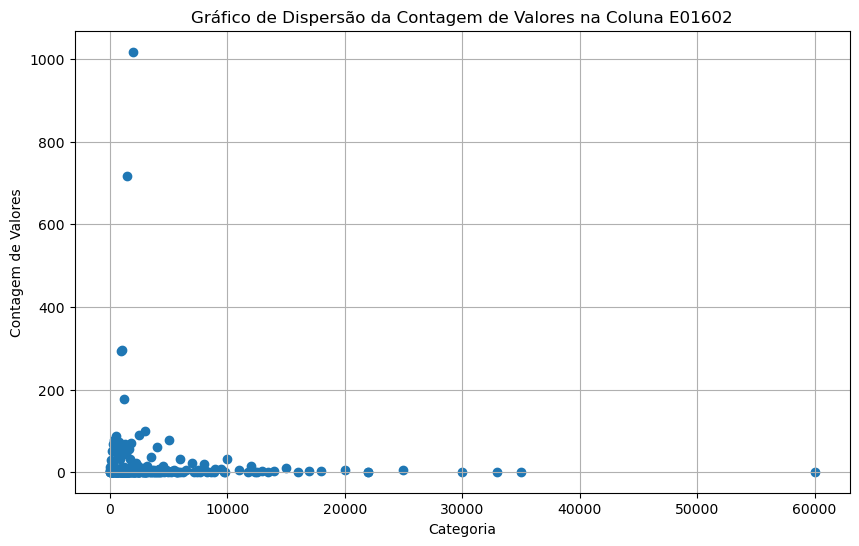

In [9]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(valores_salario.index, valores_salario.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores na Coluna E01602')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

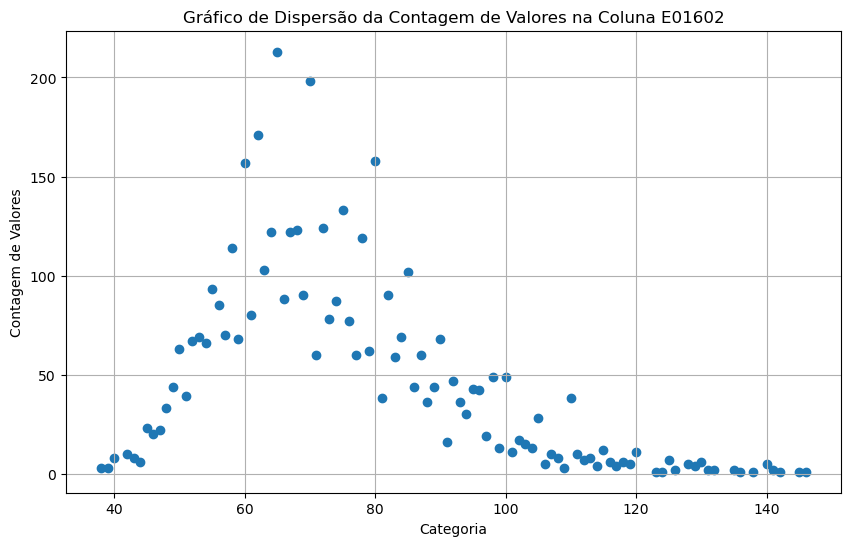

In [10]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(valores_peso.index, valores_peso.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores na Coluna E01602')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

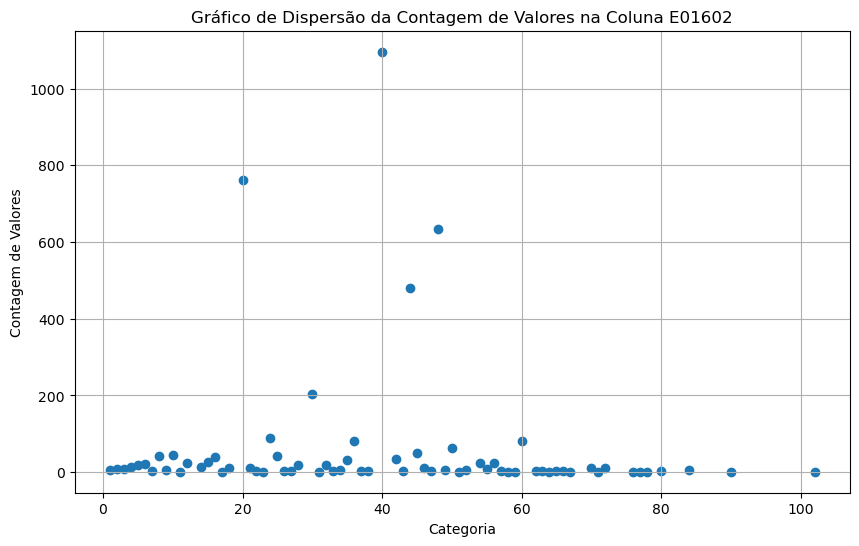

In [17]:
valores_hr_job = df['E017'].value_counts()
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(valores_hr_job.index, valores_hr_job.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores na Coluna E01602')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

### Setando os metodos utilizados

#### Usando o Metodo de Tukey

In [12]:
def remover_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    df = df[(df[coluna] >= lim_inf) & (df[coluna] <= lim_sup)]
    return df

#### Usando o Z_scores

In [21]:
def deleta_outliers_dvp(df, column, threshold=3):
  z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
  df = df[z_scores < threshold]
  return df

#### Usando o metodo de tukey para as colunas de salario e horas trabalhadas

In [14]:
df = remover_outliers_iqr(df,'E01602')

In [19]:
df = remover_outliers_iqr(df,'E017')

In [20]:
df

,C006,M01401,M01501,E01602,VDF001,E017,D00901,A001,A002010,A003010,...,P01601,P018,P02002,P023,P02501,P02602,P02601,E001,P050,Q092
1,2.0,0.0,3.0,2000.0,2.0,20.0,12.0,1.0,2.0,1.0,...,4.0,4.0,0.0,0.0,0.0,0.0,4.0,2.0,3.0,1.0
2,2.0,3.0,2.0,2000.0,2.0,30.0,10.0,1.0,1.0,1.0,...,6.0,7.0,0.0,7.0,5.0,0.0,4.0,2.0,3.0,1.0
3,2.0,3.0,1.0,3001.0,2.0,50.0,12.0,2.0,1.0,3.0,...,7.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,1.0
4,2.0,3.0,2.0,2000.0,2.0,40.0,10.0,1.0,1.0,1.0,...,3.0,7.0,2.0,5.0,2.0,0.0,2.0,2.0,3.0,1.0
5,2.0,3.0,2.0,2250.0,2.0,30.0,13.0,1.0,1.0,1.0,...,1.0,1.0,0.0,7.0,1.0,0.0,3.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553,2.0,1.0,2.0,998.0,2.0,36.0,10.0,1.0,2.0,3.0,...,0.0,1.0,0.0,1.0,7.0,0.0,3.0,1.0,3.0,2.0
4554,1.0,1.0,0.0,1200.0,2.0,60.0,10.0,1.0,1.0,2.0,...,4.0,1.0,0.0,0.0,7.0,0.0,4.0,1.0,3.0,2.0
4555,2.0,3.0,0.0,1200.0,2.0,48.0,10.0,1.0,1.0,1.0,...,7.0,3.0,7.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0
4556,2.0,3.0,0.0,600.0,2.0,50.0,10.0,1.0,4.0,1.0,...,1.0,5.0,2.0,0.0,0.0,0.0,3.0,1.0,3.0,2.0


#### Usando o metodo de Z-Scores para as colunas de Peso e Altura

In [22]:
df = deleta_outliers_dvp(df, 'P00104')

In [23]:
df = deleta_outliers_dvp(df, 'P00404')

In [26]:
#verificando tamanho da base
df.shape

(4085, 48)

### Criando Coluna de IMC 

In [27]:
#calculando 
df['P00404'] = df['P00404']/100
df['IMC'] = df['P00104']/(df['P00404'] * df['P00404'])

print(df['IMC'])

1       31.955923
2       25.970116
3       24.444444
4       24.386526
5       24.840980
          ...    
4553    23.147255
4554    23.529412
4555    32.179931
4556    25.103878
4557    28.734694
Name: IMC, Length: 4085, dtype: float64


In [28]:
df.drop(columns=['P00104'], inplace=True)
df.drop(columns=['P00404'], inplace=True)

In [29]:
df.columns

Index(['C006', 'M01401', 'M01501', 'E01602', 'VDF001', 'E017', 'D00901',
       'A001', 'A002010', 'A003010', 'A004010', 'J007', 'Q11006', 'N00101',
       'P034', 'P027', 'J01101', 'J014', 'N010', 'N011', 'N012', 'N013',
       'N014', 'N015', 'N016', 'N017', 'N018', 'J001', 'J00101', 'J002',
       'P006', 'P00901', 'P01101', 'P013', 'P015', 'P02001', 'P01601', 'P018',
       'P02002', 'P023', 'P02501', 'P02602', 'P02601', 'E001', 'P050', 'Q092',
       'IMC'],
      dtype='object')

In [30]:
df.to_csv("base_sem_outliers.csv")